# Лабораторная работа №6. Дискретное косинусное преобразрвание
## Сергиенко Кирилл, 5130901/10202

In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from scipy.stats import linregress
sys.path.append('../')
from thinkdsp import read_wave, decorate, Spectrogram, UncorrelatedGaussianNoise

## Упражнение 6.1

В этой главе утверждается, что analyze1 требует времени пропорционально
n^3, а analyze2 - пропорционально n^2. Убедимся в этом, запуская их с несколькими разными массивами и засекая время работы.
Если печатать зависимость времени работы от размера на логарифмической шкале, то должна получиться прямая линия с уклоном 3 для analyze1 и с уклоном 2 для analyze2.
Также поупражняемся с dct_iv и scipy.fftpack.dct.

Создадим шумовой сигнал:

In [2]:
signal = UncorrelatedGaussianNoise()
noise = signal.make_wave(duration=1.0, framerate=16384)
noise.ys.shape

(16384,)

Создадим функцию отображения результатов анализа, которая аппроксимирует результат прямой линией:

In [3]:
loglog = dict(xscale='log', yscale='log')

def plot_bests(ns, bests):    
    plt.plot(ns, bests)
    decorate(**loglog)
    
    x = np.log(ns)
    y = np.log(bests)
    t = linregress(x,y)
    slope = t[0]

    return slope
PI2 = np.pi * 2

def analyze1(ys, fs, ts):
    args = np.outer(ts, fs)
    M = np.cos(PI2 * args)
    amps = np.linalg.solve(M, ys)
    return amps

def run_speed_test(ns, func):
    results = []
    for N in ns:
        print(N)
        ts = (0.5 + np.arange(N)) / N
        freqs = (0.5 + np.arange(N)) / 2
        ys = noise.ys[:N]
        result = %timeit -r1 -o func(ys, freqs, ts)
        results.append(result)
        
    bests = [result.best for result in results]
    return bests

Протестируем. Результаты для analyze1:

64
1.28 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1,000 loops each)
128
3.84 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
256
9.45 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
512
16.2 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
1024
29.8 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)
2048
100 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)
4096
370 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


1.2714912914666332

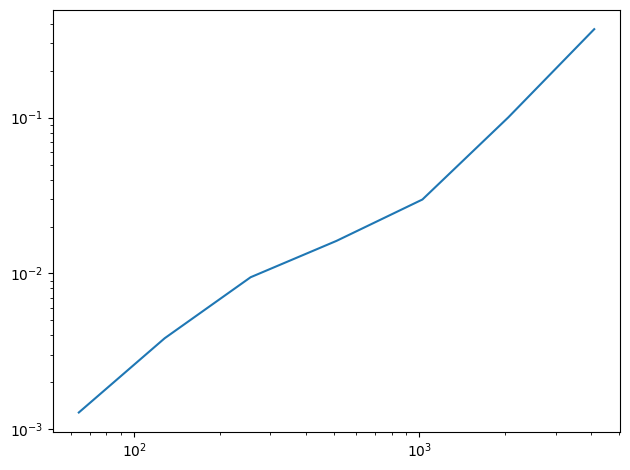

In [4]:
ns = 2 ** np.arange(6, 13)
bests = run_speed_test(ns, analyze1)
plot_bests(ns, bests)

Напишем функцию analyze2:

In [5]:
def analyze2(ys, fs, ts):
    args = np.outer(ts, fs)
    M = np.cos(PI2 * args)
    amps = np.dot(M, ys) / 2
    return amps

Протестируем её:

64
20.2 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 10,000 loops each)
128
144 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 10,000 loops each)
256
376 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1,000 loops each)
512
1.77 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1,000 loops each)
1024
6.41 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
2048
26.4 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)
4096
104 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)


2.003942779889268

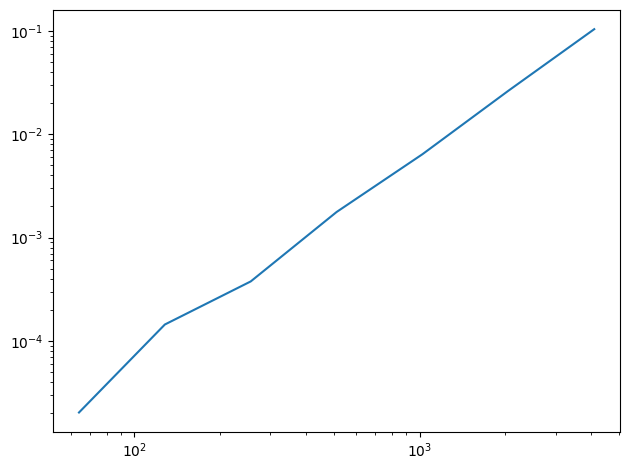

In [6]:
bests2 = run_speed_test(ns, analyze2)
plot_bests(ns, bests2)

Как и ожидалось, в результате получена почти прямая линия с наклоном, близким к 2.

Протестируем scipy.fftpack.dct:

64
2.46 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 100,000 loops each)
128
2.62 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 100,000 loops each)
256
3.04 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 100,000 loops each)
512
3.45 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 100,000 loops each)
1024
4.65 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 100,000 loops each)
2048
7.33 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 100,000 loops each)
4096
13.5 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 100,000 loops each)


0.3907227603215657

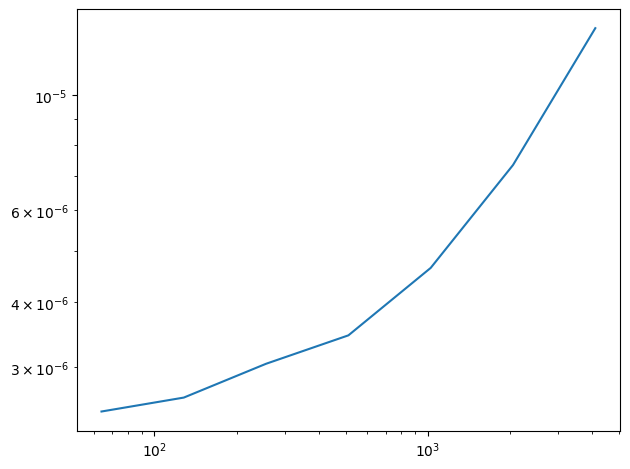

In [7]:
import scipy.fftpack

def scipy_dct(ys, freqs, ts):
    return scipy.fftpack.dct(ys, type=3)
    
bests3 = run_speed_test(ns, scipy_dct)
plot_bests(ns, bests3)

По графику видно, что функция работает быстрее, время её работы пропорционально N * log(N).

Протестируем dct_iv:

64
23.8 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 10,000 loops each)
128
153 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 10,000 loops each)
256
684 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1,000 loops each)
512
1.77 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1,000 loops each)
1024
6.34 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
2048
26.1 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)
4096
104 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)


1.9397852985676072

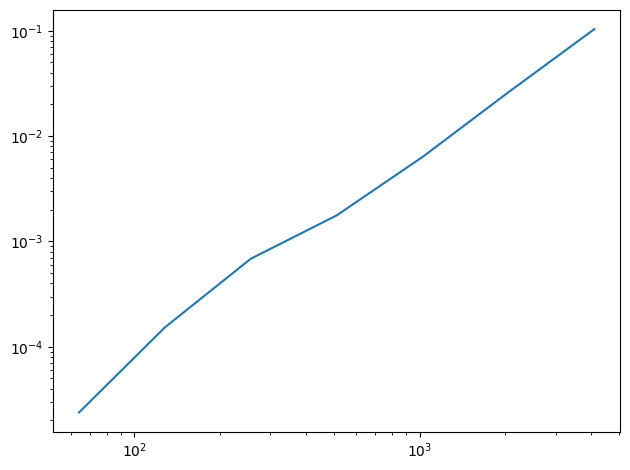

In [8]:
def dct_iv(ys, freqs, ts):
  N = len(ys)
  ts = (0.5 + np.arange(N))/N
  fs = (0.5 + np.arange(N))/2
  args = np.outer(ts,fs)
  M = np.cos(PI2*args)
  amps = np.dot(M, ys) / 2
  return amps

best4 = run_speed_test(ns, dct_iv)
plot_bests(ns, best4)

Результат - линия с наклоном около 1.9.

## Упражнение 6.2

Oдно из основных применений ДКП - это сжатие звука и изображений.
В простейшей форме ДКП при сжатии работает следующим
образом:
1. Разбивает длинный сигнал на сегменты.
2. Вычисляет ДКП каждого сегмента.
3. Определяет частотные компоненты с такой амплитудой, что
их не слышно, и удаляет их, сохраняя только оставшиеся частоты
и амплитуды.
4. При воспроизведении сигнала загружает частоты и амплитуды
каждого сегмента и применяет обратное ДКП.

Реализуем версию этого алгоритма и применим его для записи
музыки или речи. Посмотрим, сколько компонент можно удалить до того, как
разница станет заметной.

Послушаем запись:

In [9]:
wave = read_wave('100475__iluppai__saxophone-weep.wav')
wave.make_audio()

Извлечём фрагмент:

In [10]:
segment = wave.segment(start=1.2, duration=0.5)
segment.normalize()
segment.make_audio()

Получим ДКП сигнала:

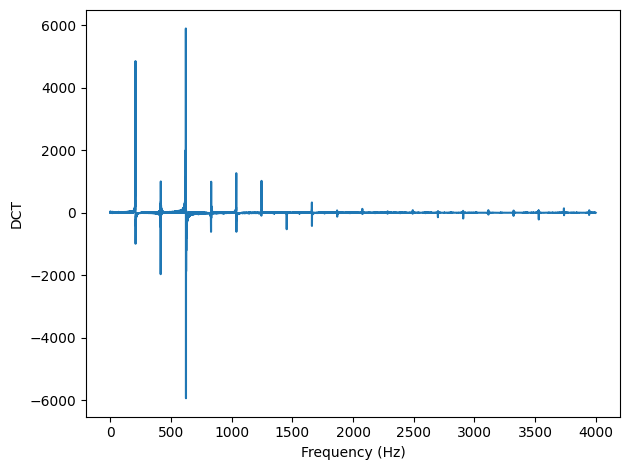

In [11]:
seg_dct = segment.make_dct()
seg_dct.plot(high=4000)
decorate(xlabel='Frequency (Hz)', ylabel='DCT')

Напишем функцию, которая убирает из ДКП частоты со значениями ниже заданного treshold:

In [12]:
def compress(dct, thresh=1):
    count = 0
    for i, amp in enumerate(dct.amps):
        if np.abs(amp) < thresh:
            dct.hs[i] = 0
            count += 1
            
    n = len(dct.amps)
    print(count, n, 100 * count / n, sep='\t')

Применим функцию к заданному сигналу:

20457	22050	92.77551020408163


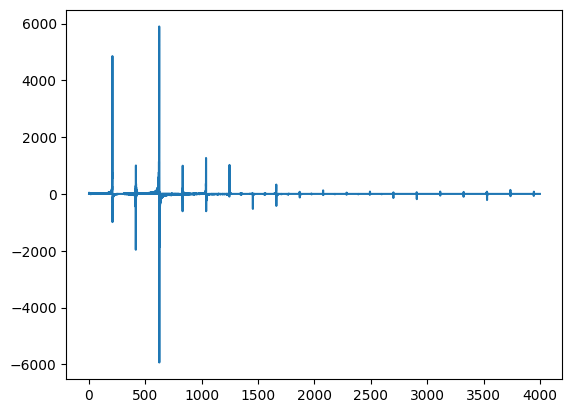

In [13]:
seg_dct = segment.make_dct()
compress(seg_dct, thresh=10)
seg_dct.plot(high=4000)

In [14]:
seg2 = seg_dct.make_wave()
seg2.make_audio()

Звук почти не изменился.
Создадим функцию, которая позволит получить спектрограмму ДКП:

In [15]:
def make_dct_spectrogram(wave, seg_length):
    window = np.hamming(seg_length)
    i, j = 0, seg_length
    step = seg_length // 2

    spec_map = {}

    while j < len(wave.ys):
        segment = wave.slice(i, j)
        segment.window(window)

        t = (segment.start + segment.end) / 2
        spec_map[t] = segment.make_dct()

        i += step
        j += step

    return Spectrogram(spec_map, seg_length)

Теперь можно сжать все сегменты ДСП:

In [22]:
spectro = make_dct_spectrogram(wave, seg_length=1024)
for t, dct in sorted(spectro.spec_map.items()):
    compress(dct, thresh=0.01)

276	1024	26.953125
280	1024	27.34375
275	1024	26.85546875
283	1024	27.63671875
262	1024	25.5859375
246	1024	24.0234375
268	1024	26.171875
273	1024	26.66015625
263	1024	25.68359375
249	1024	24.31640625
263	1024	25.68359375
274	1024	26.7578125
277	1024	27.05078125
293	1024	28.61328125
266	1024	25.9765625
263	1024	25.68359375
259	1024	25.29296875
307	1024	29.98046875
253	1024	24.70703125
274	1024	26.7578125
276	1024	26.953125
263	1024	25.68359375
287	1024	28.02734375
254	1024	24.8046875
218	1024	21.2890625
180	1024	17.578125
163	1024	15.91796875
206	1024	20.1171875
226	1024	22.0703125
227	1024	22.16796875
215	1024	20.99609375
203	1024	19.82421875
172	1024	16.796875
183	1024	17.87109375
168	1024	16.40625
209	1024	20.41015625
203	1024	19.82421875
182	1024	17.7734375
209	1024	20.41015625
198	1024	19.3359375
219	1024	21.38671875
212	1024	20.703125
227	1024	22.16796875
199	1024	19.43359375
203	1024	19.82421875
221	1024	21.58203125
186	1024	18.1640625
234	1024	22.8515625
190	1024	18.5546875
205

In [23]:
wave2 = spectro.make_wave()
wave2.make_audio()

Если увеличить сжатие, то становятся заметны шумы:

In [24]:
spectro = make_dct_spectrogram(wave, seg_length=1024)
for t, dct in sorted(spectro.spec_map.items()):
    compress(dct, thresh=0.2)

1018	1024	99.4140625
1016	1024	99.21875
1014	1024	99.0234375
1017	1024	99.31640625
1016	1024	99.21875
1017	1024	99.31640625
1016	1024	99.21875
1020	1024	99.609375
1014	1024	99.0234375
1005	1024	98.14453125
1009	1024	98.53515625
1015	1024	99.12109375
1015	1024	99.12109375
1016	1024	99.21875
1016	1024	99.21875
1015	1024	99.12109375
1017	1024	99.31640625
1020	1024	99.609375
1013	1024	98.92578125
1017	1024	99.31640625
1013	1024	98.92578125
1017	1024	99.31640625
1018	1024	99.4140625
1015	1024	99.12109375
1013	1024	98.92578125
794	1024	77.5390625
785	1024	76.66015625
955	1024	93.26171875
995	1024	97.16796875
992	1024	96.875
976	1024	95.3125
925	1024	90.33203125
802	1024	78.3203125
836	1024	81.640625
850	1024	83.0078125
882	1024	86.1328125
883	1024	86.23046875
891	1024	87.01171875
901	1024	87.98828125
902	1024	88.0859375
900	1024	87.890625
900	1024	87.890625
894	1024	87.3046875
904	1024	88.28125
901	1024	87.98828125
915	1024	89.35546875
913	1024	89.16015625
899	1024	87.79296875
905	1024	88.37

In [25]:
wave2 = spectro.make_wave()
wave2.make_audio()

## Упражнение 6.3
Загрузим и послушаем запись:

In [27]:
wave = read_wave('77685__juskiddink__anna-britta-sax.wav')
wave.make_audio()

Выделим фрагмент исходной записи:

In [28]:
segment = wave.segment(start=1, duration=0.5)
segment.normalize()
segment.make_audio()

Напишем функции для вывода амплитуды, углов и waveform заданного спектра:

In [29]:
def plot_angle(spectrum, thresh=1):
    angles = spectrum.angles
    angles[spectrum.amps < thresh] = np.nan
    plt.plot(spectrum.fs, angles, 'x')
    decorate(xlabel='Frequency (Hz)', 
             ylabel='Phase (radian)')
    
def plot_three(spectrum, thresh=1):
    plt.figure(figsize=(10, 4))
    plt.subplot(1,3,1)
    spectrum.plot()
    plt.subplot(1,3,2)
    plot_angle(spectrum, thresh=thresh)
    plt.subplot(1,3,3)
    wave = spectrum.make_wave()
    wave.unbias()
    wave.normalize()
    wave.segment(duration=0.01).plot()
    display(wave.make_audio())

Получим данные для изначального сегмента:

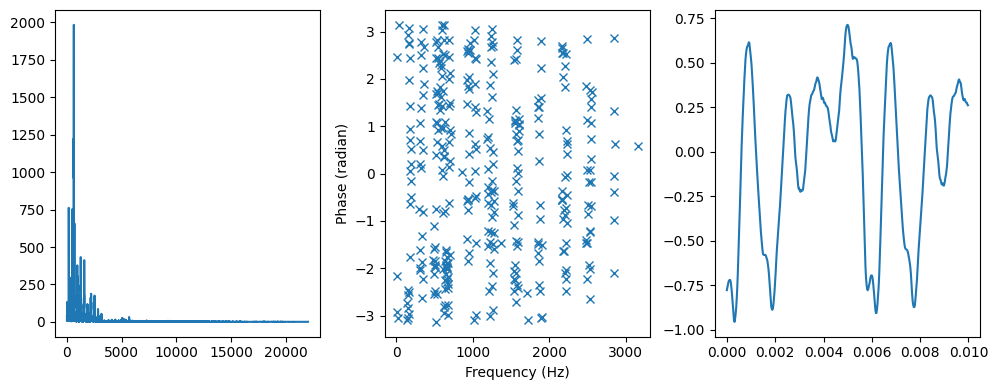

In [30]:
spectrum = segment.make_spectrum()
plot_three(spectrum, thresh=50)

Напишем функцию для обнуления всех углов сегмента:

In [31]:
def zero_angle(spectrum):
    res = spectrum.copy()
    res.hs = res.amps
    return res

Протестируем её:

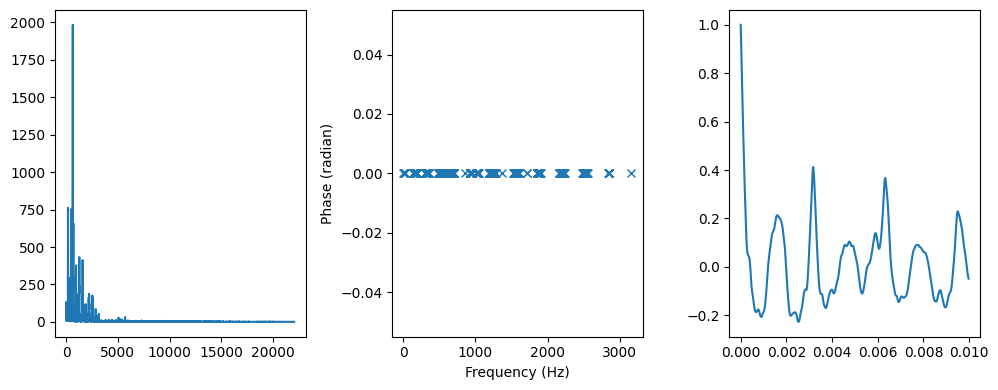

In [32]:
spectrum2 = zero_angle(spectrum)
plot_three(spectrum2, thresh=50)

Запись стала намного тише.

Напишем функцию для поворота углов на 1 радиан и проверим её работу:

In [33]:
def rotate_angle(spectrum, offset):
    res = spectrum.copy()
    res.hs *= np.exp(1j * offset)
    return res

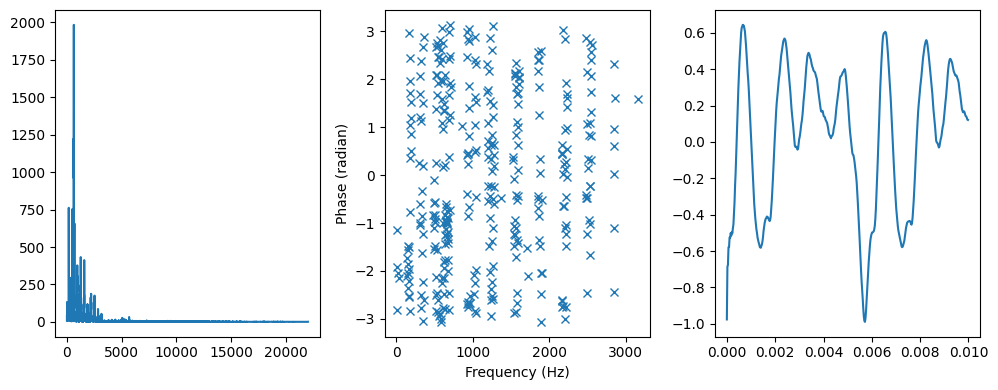

In [34]:
spectrum3 = rotate_angle(spectrum, 1)
plot_three(spectrum3, thresh=50)

На слух звук не изменился.

Создадим функцию для рандомизации углов:

In [35]:
PI2 = np.pi * 2

def random_angle(spectrum):
    res = spectrum.copy()
    angles = np.random.uniform(0, PI2, len(spectrum))
    res.hs *= np.exp(1j * angles)
    return res

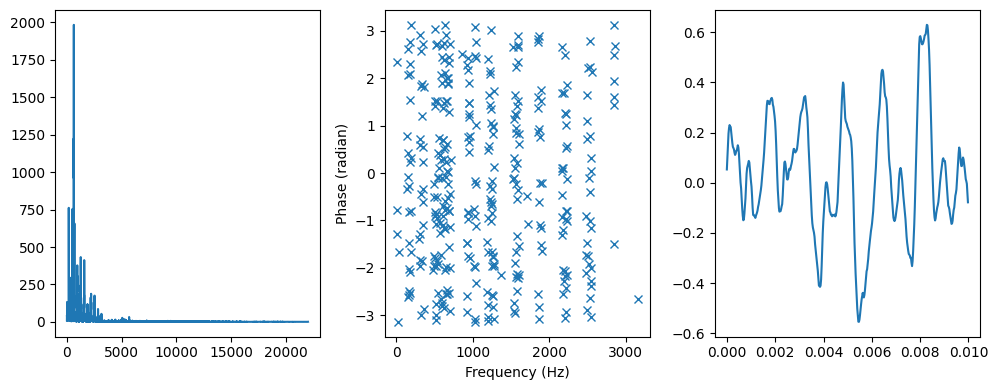

In [36]:
spectrum4 = random_angle(spectrum)
plot_three(spectrum4, thresh=50)

К звуку изначальной записи добавилось эхо.